
# Resolucion numerica de ecuaciones diferenciales

---




# Euler

1.  Escribir un programa que implemente el método de Euler explícito para aproximar numéricamente la solución $x(t)$ de la siguiente ecuación diferencial en el intervalo $\left[t_{0}, t_{F}\right]$ :

$$
\left\{\begin{array}{l}
\dot{x}(t)=f(t, x(t)), \\
x\left(t_{0}\right)=x_{0},
\end{array}\right.
$$

¿Qué parámetros debe recibir y qué información debe devolver este programa para que la aproximación obtenida pueda graficarse?

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [28]:
def Euler(function,tspan, y0,step, *param):
    
    # tspan =(a,b)
    
    t = np.arange(tspan[0],tspan[1],step)
    N =  len(t)
    
    if np.isscalar(y0):
        y = np.zeros(N)
        y[0] = y0
        for j in range(1,N):
            y[j] = y[j-1] + step*function(t[j-1],y[j-1],*param)        
    else:     
        y = np.zeros((len(y0), N))
        y[:,0] = y0
        for j in range(1,N):
            y[:,j] = y[:,j-1] + step*function(t[j-1],y[:,j-1], *param)

    return t, y

2. Graficar simultáneamente las soluciones numéricas que se obtienen del problema de valores iniciales

$$
\left\{\begin{array}{l}
\dot{x}(t)=(x(t)-5) \cdot\left(\cos ^{2}(t)-0.5\right), \\
x(0)=k,
\end{array}\right.
$$

al utilizar el método de Euler con paso $h=0.01$ para $k=0,1, \ldots, 10$ y $t_{F}=20$.

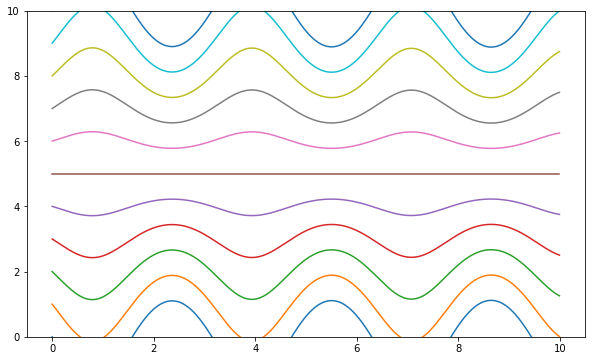

In [29]:
def fun1(t,x):
    rhs = (x-5)*((np.cos(t))**2 - 0.5)
    return rhs

tspan = (0,10)
x0 = [k for k in range(0,11)]
step = 0.01


plt.figure(figsize = (10,6))

for k in x0 :
    t, x = Euler(fun1, tspan, k,step )
    plt.plot(t, x)
    plt.ylim(0,10)

  

3. Se considera la siguiente ecuación diferencial:

$$
\left\{\begin{array}{l}
\dot{x}(t)=2 x(t)-5 \sin(t), \\
x(0)=1,
\end{array}\right.
$$

cuya solución exacta es la función $x(t)=2 \sin(t)+\cos (t)$.

a) Escribir la iteración del método de Euler para esta ecuación.

b) Graficar la solución exacta en el intervalo $[0,2]$ junto con las aproximaciones que se obtienen utilizando el método de Euler para $h=0.1, h=0.01$ y $h=0.001$.

c) Graficar la diferencia entre las soluciones numéricas del ítem anterior y la solución exacta.

d) Graficar el error final, para $t=2$, como función de $h$ (asegúrese de usar gráficos en escala logarítimica).


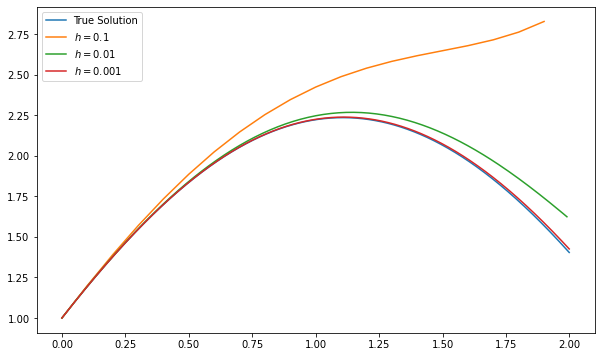

In [30]:
def fun2(t, x):
  rhs = 2*x - 5*np.sin(t)

  return rhs

x0 = 1
H = [0.1, 0.01, 0.001]
tspan = [0, 2]
t = np.arange(tspan[0],tspan[1],0.001)
sol = lambda t: 2*np.sin(t) + np.cos(t) 

plt.figure(figsize = (10,6))
plt.plot(t, sol(t), label ="True Solution")

for h in H:
    t, x = Euler(fun2, tspan, x0, step=h)
    plt.plot(t, x, label = '$h = $' + str(h))
    plt.legend()


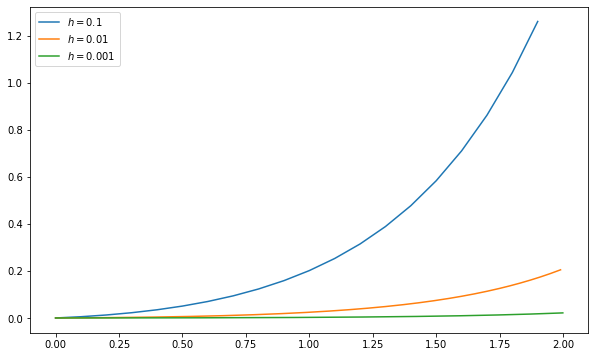

In [31]:
plt.figure(figsize = (10,6))

for h in H:
    t, x = Euler(fun2, tspan, x0, step=h)
    err = np.abs(x - sol(t))
    #plt.yscale("log")
    plt.plot(t, err, label = '$h = $' + str(h))
    #plt.ylim((-1e-2, ))
    plt.legend()


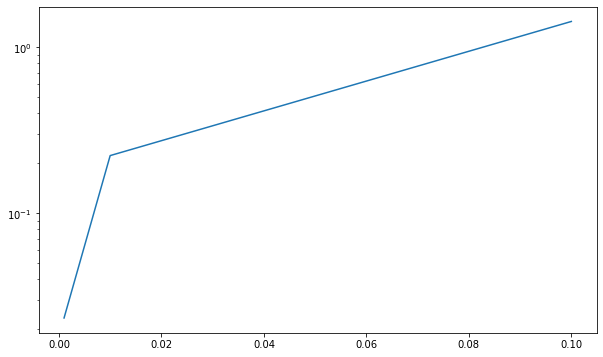

In [32]:
err_tfinal = []
for h in H:
    _, x = Euler(fun2, tspan, x0, step=h)
    err_tfinal.append(np.abs(x[-1] - sol(2)))


err_tfinal

plt.figure(figsize = (10,6))
plt.yscale("log")
plt.plot(H, err_tfinal)
plt.show()

f) Para hacer en la computadora: hallar h num´ericamente, para que el error al estimar x(10) con el
m´etodo de Euler sea menor que 10−4
. ¡Comparar la cota teorica!

In [33]:
true_x = lambda t: 2*np.sin(t) + np.cos(t)

x0 = 1
tspan = [0,2]
_, x = Euler(fun2, tspan, x0, step=1e-6)

x[-1]

1.402471491490769

In [34]:
true_x(2)

1.402448017104221

In [35]:
np.abs(x[-1] - true_x(2))

2.3474386547928106e-05

In [36]:
#true_x = lambda t: 2*np.sin(t) + np.cos(t)


#H = [1/10**i for i in range(5, 8)]
#tspan = [0, 10]

#for h in H:
#    _, x = Euler(fun2, tspan, x0, step=h)
#    if np.abs(x[-1] - true_x(10)) <= 1e-4:
#      print(h)
#      break
#    else :
#      print("the error is: ", np.abs(x[-1] - true_x(10)))



## ejercicio 4

Se considera la siguiente ecuación diferencial:

$$
\left\{\begin{array}{l}
\dot{x}(t)=\sin(x(t))+2 e^{-t} \\
x(0)=1
\end{array}\right.
$$

a) Escribir la iteración del método de Euler para esta ecuación.
    
b) Hallar $h$ para que el error al estimar $x(1)$ con el método de Euler sea menor que $10^{-3}$.


In [37]:
fun4 =lambda t,x: np.sin(x) +2*np.exp(-t)
tspan =[0,1]
x0 =1
_,x =Euler(fun4, tspan, x0, 1e-3)
x[-1]

2.959817958520629

## Ejercicio 5

Considerar el problema

$$
\left\{\begin{array}{l}
\dot{x}(t)=\lambda x(t), \\
x(0)=x_{0} .
\end{array}\right.
$$

El método de Euler explícito, con paso $h=t_{F} / N$ genera la sucesión
\begin{align*}    
& x_{0}, \quad x_{1}=x_{0}+h \lambda x_{0}=x_{0}(1+\lambda h),
\\
&x_{2}=x_{1}+h \lambda x_{1}=x_{1}(1+\lambda h)=x_{0}(1+\lambda h)^{2}, \quad \cdots \\
&x_{N}=x_{0}(1+\lambda h)^{N}=x_{0}\left(1+\frac{\lambda t_{F}}{N}\right)^{N}
\end{align*}

Cuando $N \rightarrow \infty$ (equivalentemente, cuando $h \rightarrow 0$ ), la sucesión converge a $x_{0} e^{\lambda t_{F}}$.

a) Resolver usando el programa del Ejercicio 1 para distintos valores de $h$ y para $\lambda=1,10,100$ y comparar con la solución exacta, $x(t)=x_{0} e^{\lambda t}$. ¿Qué sucede?

b) ¿Qué se observa si se utiliza el método de Euler implícito?


### Euler implicito para este problema:

Recordar que Euler implicito es una variante de Euler donde:
$$
x_{i+1} = x_i +hf(t_{i+1}, x_{i+1})
$$
de la ecuaci\'on de arriba se despeja si es posible $x_{i+1}$ y eso da la recurrencia para estimar la solucion de $y' =f(t,y)$ con $y(t_0)=y_0$.

Si no es posible despejar $x_{i+1}$ de la ecuacion de arriba entonces se consiera la siguiente recurrencia:

$$
x_{i+1} = y_i +hf(t_i, x_i +hf(t_i,x_i))
$$

En el caso de este problema como $f(t,x)= \lambda*x$ la recuerrencia es:
$$
x_{i+1} = x_i +h\lambda x_{i+1}
$$

de donde queda: $x_{i+1} = \frac{1}{1-h*\lambda}*x_i = \frac{1}{(1-h\lambda)^{i+1}}x_0$


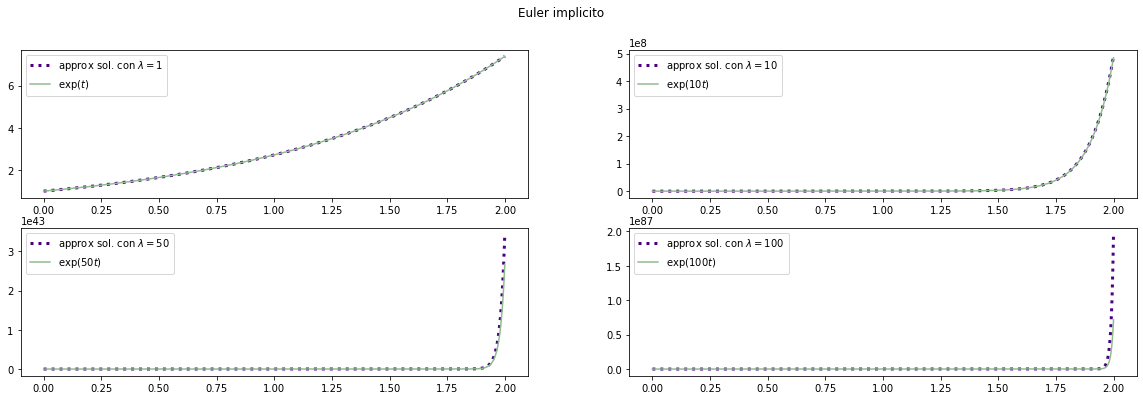

In [38]:
x0 = 1
h = 0.0001
t = np.arange(0,2, h)
N = len(t)


x1 = np.array([1/(1-h)**i for i in range(N)])
x2 = np.array([1/(1-h*10)**i for i in range(N)])
x3 = np.array([1/(1-h*50)**i for i in range(N)])
x4 = np.array([1/(1-h*100)**i for i in range(N)])

plt.figure(figsize = (20,6))
plt.subplot(221)
plt.plot(t, x1, label= 'approx sol. con $\lambda = 1$', linestyle='dotted', color = "indigo", linewidth=3.0)
plt.plot(t, np.exp(t), label = '$\exp(t)$', color = "darkseagreen")
plt.legend()
plt.subplot(222)
plt.plot(t, x2, label= 'approx sol. con $\lambda = 10$', linestyle='dotted', color = "indigo", linewidth=3.0)
plt.plot(t, np.exp(10*t), label = '$\exp(10t)$', color = "darkseagreen")
plt.legend()
plt.subplot(223)
plt.plot(t, x3, label= 'approx sol. con $\lambda = 50$', linestyle='dotted', color = "indigo", linewidth=3.0)
plt.plot(t, np.exp(50*t), label = '$\exp(50t)$', color = "darkseagreen")
plt.legend()
plt.subplot(224)
plt.plot(t, x4, label= 'approx sol. con $\lambda = 100$', linestyle='dotted', color = "indigo", linewidth=3.0)
plt.plot(t, np.exp(100*t), label = '$\exp(100t)$', color = "darkseagreen")
plt.legend()
plt.suptitle('Euler implicito')
plt.show()

# Metodo de Taylor

## Ejercicio 6

Se quiere verificar numéricamente el orden de convergencia de los métodos de Euler y Taylor de orden 2. Para ello: resolver numéricamente el problema

$$
\left\{\begin{array}{l}
\dot{x}(t)=x(t), \\
x\left(t_{0}\right)=1,
\end{array}\right.
$$

en el intervalo $[0,1]$ con ambos métodos, tomando $h=0.1 ; 0.05 ; 0.01 ; 0.005 ; 0.001 ; 0.0005$.

Obtener la solución exacta y para cada $h$, calcular el error que se comete al aproximar $x(1): E_{N}=$ $\left|x(1)-x_{N}\right|$. Graficar $\log \left(E_{N}\right)$ en función de $\log (h)$. ¿Qué se espera ver? ¿El resultado es consistente con el esperado?

In [39]:
def Taylor2(f, der_f, tspan, y0, step) :
    
    t = np.arange(tspan[0], tspan[1],step)
    N = len(t)
    y = np.zeros(N)
    y[0] = y0
    for i in range(1,N):
        y[i] = y[i-1] +step*f(t[i-1],y[i-1]) + 0.5*step**2*der_f(t[i-1],y[i-1])
        
    return t, y

In [40]:
def fun6(t,x):
    
    rhs = x
    return rhs

def der_fun6(t,x):
    return fun6(t,x)



H = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]
tspan = [0, 1]
x0 = 1
errorEuler = np.zeros(len(H))
errorTaylor = np.zeros(len(H))


for i,h in enumerate(H):
    t, x = Euler(fun6, tspan, x0, step = h)
    errorEuler[i] = np.abs(np.e - x[-1])
    _, xtaylor = Taylor2(fun6, der_fun6, tspan, x0, step = h)
    errorTaylor[i] = np.abs(np.e - xtaylor[-1])
    

In [41]:
np.sort(H)

array([0.0005, 0.001 , 0.005 , 0.01  , 0.05  , 0.1   ])

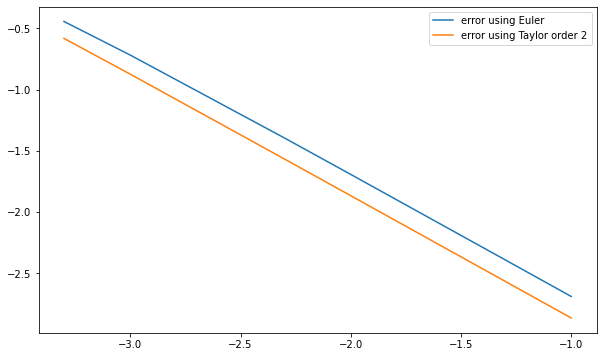

In [42]:
plt.figure(figsize = (10,6))
plt.plot(np.log10(np.array(np.sort(H))), np.log10(errorEuler), label = 'error using Euler')
plt.plot(np.log10(np.array(np.sort(H))), np.log10(errorTaylor), label= 'error using Taylor order 2')
plt.legend()
plt.show()

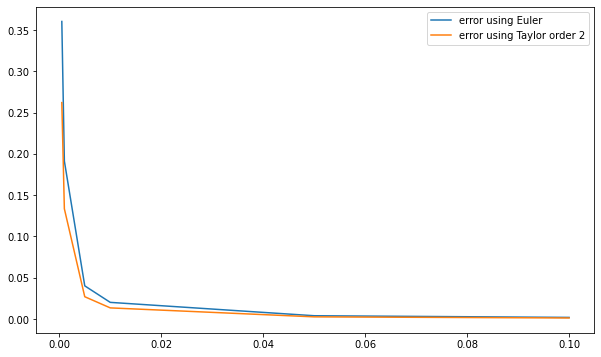

In [43]:
plt.figure(figsize = (10,6))
plt.plot(np.array(np.sort(H)), errorEuler, label = 'error using Euler')
plt.plot(np.array(np.sort(H)), errorTaylor, label= 'error using Taylor order 2')
plt.legend()
plt.show()

# Euler modificado:

La iteración de este método es:

$$
x_{n}=x_{n-1}+h f\left(t_{n-1}+\frac{h}{2}, x_{n-1}+\frac{h}{2} f\left(t_{n-1}, x_{n-1}\right)\right),
$$


In [44]:
# implementacion

def EulerModified(function,tspan, x0,step, *param):
    # tspan is a tuple or list of two elements
    # function is the function f(t,x) with variables in this order
    
    t = np.arange(tspan[0],tspan[1],step)
    N =  len(t)
    
    if np.isscalar(x0):
        x = np.zeros(N)
        x[0] = x0
        for j in range(1,N):
            x[j] = x[j-1] + step*function(t[j-1] + step/2,x[j-1] + step/2*function(t[j-1], x[j-1], *param),*param)        
    else:     
        x = np.zeros((len(x0), N))
        x[:,0] = x0
        for j in range(1,N):
            x[:,j] = x[:,j-1] + step*function(t[j-1] +step/2, x[:,j-1] + step/2*function(t[j-1], x[:,j-1], *param), *param)

    return t, x

# Método de Heun

La iteración es:

$$
x_{n}=x_{n-1}+h \frac{1}{2}\left(f\left(t_{n-1}, x_{n-1}\right)+f\left(t_{n-1}+h, x_{n-1}+h f\left(t_{n-1}, x_{n-1}\right)\right)\right),
$$


In [45]:
# implementacion

def Heun(function,tspan, x0,step, *param):
    # tspan is a tuple or list of two elements
    # function is the function f(t,x) with variables in this order
    
    t = np.arange(tspan[0],tspan[1],step)
    N =  len(t)
    
    if np.isscalar(x0):
        x = np.zeros(N)
        x[0] = x0
        for j in range(1,N):
            x[j] = x[j-1] + 0.5*step*(function(t[j-1] ,x[j-1], *param) + function(t[j-1] + step, x[j-1] + 
                                                                                  step*function(t[j-1], x[j-1],*param),*param))        
    else:     
        x = np.zeros((len(x0), N))
        x[:,0] = x0
        for j in range(1,N):
            x[:,j] = x[:,j-1] + 0.5*step*(function(t[j-1] ,x[:,j-1], *param) + function(t[j-1] + step, x[:,j-1] + 
                                                                                  step*function(t[j-1], x[:,j-1],*param),*param))        

    return t, x

## Ejercicio 7
Para $h=0.1, h=0.01$ y $h=0.001$ graficar la solución exacta de la ecuación diferencial del Ejercicio 3, junto con la aproximación que se obtiene mediante los métodos de Euler, Euler modificado y Heun. 

$$
\left\{\begin{array}{l}
\dot{x}(t)=2 x(t)-5 \sin(t), \\
x(0)=1,
\end{array}\right.
$$

cuya solución exacta es la función $x(t)=2 \sin(t)+\cos (t)$

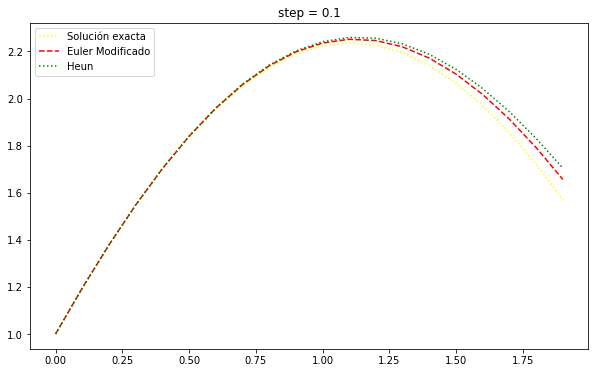

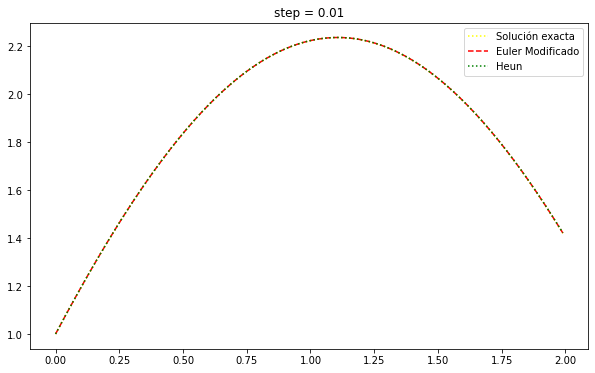

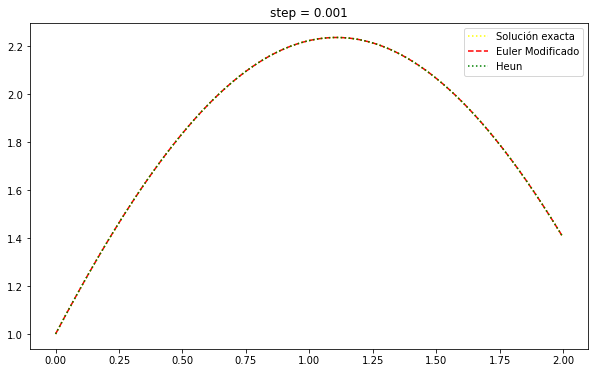

In [46]:
fun7 = lambda t,x: 2*x - 5*np.sin(t)
x0 = 1
tspan = [0, 2]
true_sol = lambda t: 2*np.sin(t) + np.cos(t)
H = [0.1, 0.01, 0.001]

for step in H:
  t, x1 = EulerModified(fun7, tspan, x0, step)
  _, x2 = Heun(fun7, tspan, x0, step)

  plt.figure(figsize = (10,6))
  plt.plot(t, true_sol(t), color = "yellow", linestyle = "dotted",  label = "Solución exacta")
  plt.plot(t, x1, color = "red", linestyle = "dashed", label = "Euler Modificado")
  plt.plot(t, x2, color = "green", linestyle = "dotted", label = "Heun")
  plt.title("step = " + str(step))
  plt.legend()


  



## Ejercicio 8: repetir el ejercicio 6 con Euler modificado y Heun

Se quiere verificar numéricamente el orden de convergencia de los métodos de Euler y Taylor de orden 2. Para ello: resolver numéricamente el problema

$$
\left\{\begin{array}{l}
\dot{x}(t)=x(t), \\
x\left(t_{0}\right)=1,
\end{array}\right.
$$

en el intervalo $[0,1]$ con ambos métodos, tomando $h=0.1 ; 0.05 ; 0.01 ; 0.005 ; 0.001 ; 0.0005$.

Obtener la solución exacta y para cada $h$, calcular el error que se comete al aproximar $x(1): E_{N}=$ $\left|x(1)-x_{N}\right|$. Graficar $\log \left(E_{N}\right)$ en función de $\log (h)$. ¿Qué se espera ver? ¿El resultado es consistente con el esperado?

In [47]:
def fun6(t,x):
    
    rhs = x
    return rhs



H = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]
tspan = [0, 1]
x0 = 1
error_EulerM = np.zeros(len(H))
error_Heun = np.zeros(len(H))


for i,h in enumerate(H):
    t, x_EulerM = EulerModified(fun6, tspan, x0, step = h)
    error_EulerM[i] = np.abs(np.e - x_EulerM[-1])
    _, x_Heun = Heun(fun6, tspan, x0, step = h)
    error_Heun[i] = np.abs(np.e - x_Heun[-1])


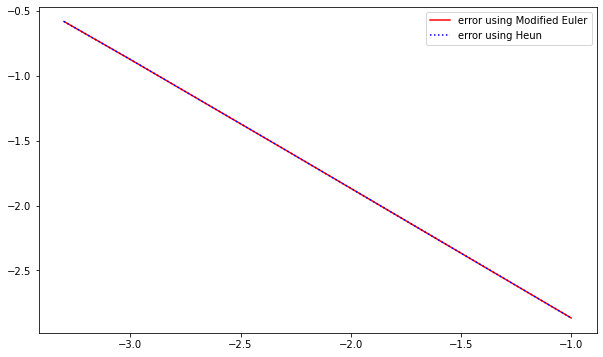

In [48]:
plt.figure(figsize = (10,6))
plt.plot(np.log10(np.array(np.sort(H))), np.log10(error_EulerM), color = "red",label = 'error using Modified Euler')
plt.plot(np.log10(np.array(np.sort(H))), np.log10(error_Heun), linestyle = "dotted",color = "blue", label= 'error using Heun')
plt.legend()
plt.show()

# Runge Kuta 

Implementar un programa para aproximar las solución de la ecuación diferencial

$$
\left\{\begin{array}{l}
\dot{x}(t)=f(t, x(t)) \\
x\left(t_{0}\right)=x_{0}
\end{array}\right.
$$

utilizando el método de Runge Kutta de orden 4 dado por:

$$
x_{n}=x_{n-1}+\frac{h}{6}\left(k_{1}+2 k_{2}+2 k_{3}+k_{4}\right),
$$

donde:

$$
\begin{aligned}
& k_{1}=f\left(t_{n-1}, x_{n-1}\right) \\
& k_{2}=f\left(t_{n-1}+h / 2, x_{n-1}+h / 2 k_{1}\right) \\
& k_{3}=f\left(t_{n-1}+h / 2, x_{n-1}+h / 2 k_{2}\right) \\
& k_{4}=f\left(t_{n-1}+h, x_{n-1}+h k_{3}\right) .
\end{aligned}
$$


In [49]:
def order4(function, tval, x, step, *param):
    
    k1 = function(tval, x, *param)
    k2 = function(tval + 0.5*step, x + 0.5*step*k1, *param)
    k3 = function(tval + 0.5*step, x + 0.5*step*k2, *param)
    k4 = function(tval + step, x + step*k3, *param)
    
    x = x +step*(k1 + 2*k2 +2*k3 + k4)/6
    
    return x


    

def RK4(function, tspan, x0, step, *param):
    
    t = np.arange(tspan[0], tspan[1], step)
    N =  len(t)
    
    if np.isscalar(x0):
        x = x0
        X = np.zeros(N)
        X[0] = x
        for j in range(1,N):
            x = order4(function, t[j-1], x, step, *param)
            X[j] = x
    else : 
        x = x0
        X = np.zeros((len(x0),N))
        X[:,0] = x
        for j in range(1,N):
            x = order4(function, t[j-1], x, step, *param)
            X[:,j] = x
    
    return t, X


## Ejercicio 9


Utilizar este método para resolver nuevamente el Ejercicio 6.

In [50]:
def fun6(t,x):
    
    rhs = x
    return rhs



H = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]
tspan = [0, 1]
x0 = 1
error_RK4 = np.zeros(len(H))


for i,h in enumerate(H):
    t, x_RK4 = RK4(fun6, tspan, x0, step = h)
    error_RK4[i] = np.abs(np.e - x_RK4[-1])
    

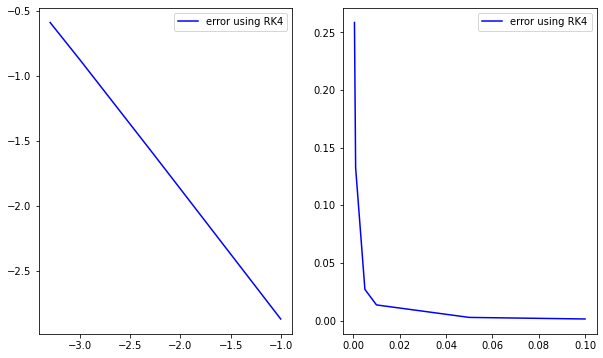

In [51]:
plt.figure(figsize = (10,6))
plt.subplot(121)
plt.plot(np.log10(np.array(np.sort(H))), np.log10(error_RK4),color = "blue", label= 'error using RK4')
plt.legend()
plt.subplot(122)
plt.plot(np.array(np.sort(H)), (error_RK4),color = "blue", label= 'error using RK4')
plt.legend()
plt.show()

In [52]:
np.log10(error_RK4)

array([-0.58723645, -0.87754724, -1.56787518, -1.8678208 , -2.56592265,
       -2.86684408])

## Ejercicio 11

Ecuación logística. Una ecuación que modela el crecimiento de una población $x(t)$ limitada por la capacidad del entorno para sostenerla es:
$$
\left\{\begin{array}{l}
\dot{x}(t)=\lambda x(t) *\left(1-x(t) / X_{m}\right) \\
x(0)=x_{0},
\end{array}\right.
$$

donde $x_{0}$ es la población inicial, $\lambda$ la tasa de crecimiento poblacional intrínseca, y $X_{m}$ la población máxima soportada por el ecosistema. Supongamos $\lambda=1, X_{m}=5$.

1. Usando el comando $\textit{solve\_ivp}$ de Python, hallar las soluciones correspondientes a datos iniciales $x(0)=0,1,2, \ldots, 5$, para $0\leq t \leq 10$.
    
2.  La solución exacta de esta ecuación es:
    $$
    x(t)=\frac{x_{0} X_{m} e^{\lambda t}}{X_{m}-x_{0}+x_{0} e^{\lambda t}} .
    $$
  Comparar con los resultados del ítem anterior.
    
3. Hallar los puntos de equilibrio de esta ecuación, linealizar en un entorno, calcular las soluciones exactas del problema linealizado, y graficar junto a lo anterior. 


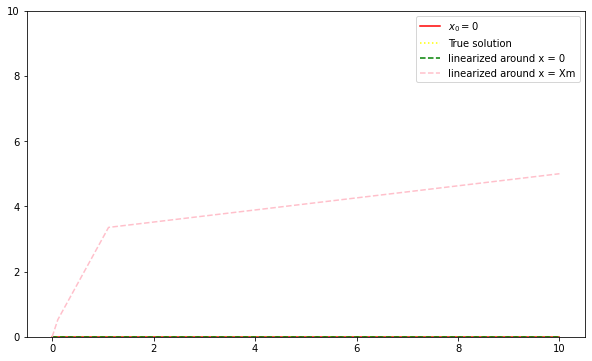

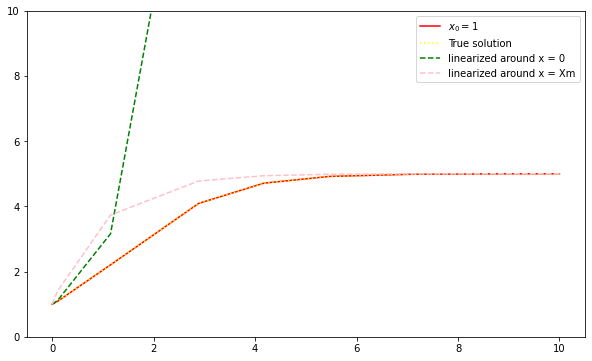

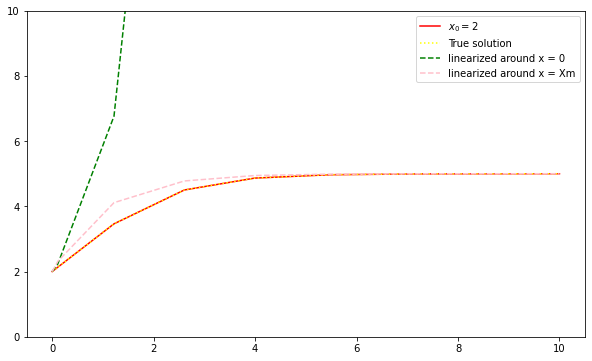

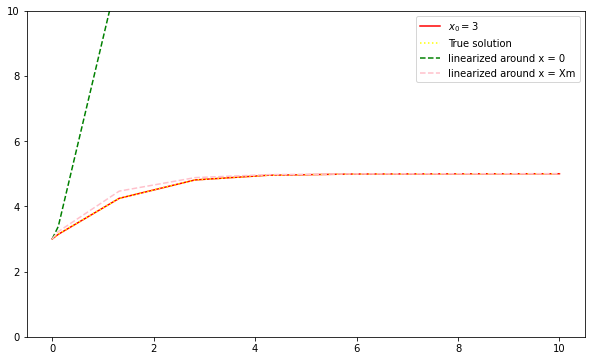

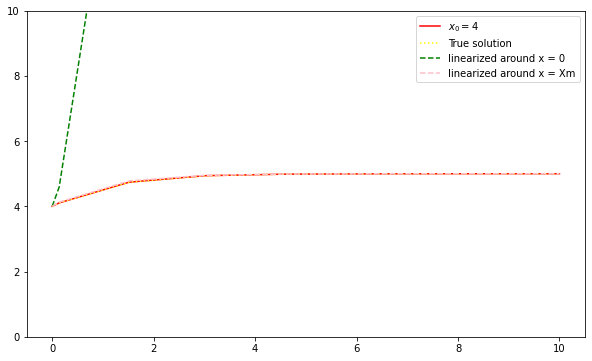

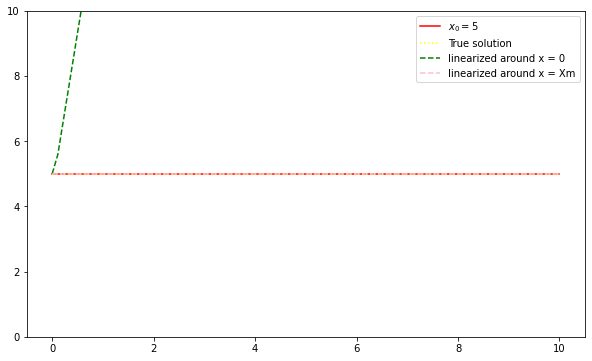

In [88]:
from scipy.integrate import solve_ivp # import library

lmbda=1 # parametro lambda
Xm = 5 # parametro Xm

fun11 = lambda t, x: lmbda * x * (1 - x/Xm)


true_sol = lambda t, x0: x0* Xm * np.exp(lmbda*t)/(Xm - x0 + x0* np.exp(lmbda*t))
sol_linear1 = lambda t, x0 : x0*np.exp(lmbda*t) # exact solution of linearized problem around the critical point x = 0 
sol_linear2 = lambda t, x0 : (x0 - Xm)* np.exp(-lmbda*t) + Xm # exact solution of linearized problem around the critical point x = Xm 



X0 = [[i] for i in range(6)]
tspan = [0, 10]



sol = solve_ivp(fun11, t_span=tspan, y0 = [1])
sol.y[0,:]


for x0 in X0:

  sol = solve_ivp(fun11, t_span = tspan, y0 = x0)
  t = sol.t
  x = sol.y[0,:]

  ax = plt.figure(figsize=(10, 6))
  plt.plot(t, x, color = "red", label = "$x_0 = $" + str(x0[0]))
  plt.plot(t, true_sol(t, x0[0]), color = "yellow", linestyle ="dotted"  ,label = "True solution")
  plt.plot(t, sol_linear1(t, x0[0]),  color = "green", linestyle ="dashed"  ,label = "linearized around x = 0")
  plt.ylim(0, 10)
  plt.plot(t, sol_linear2(t, x0[0]), color = "pink", linestyle ="dashed"  ,label = "linearized around x = Xm")
  

  plt.legend()
  plt.show()




In [72]:
x0 = [2]
x0[0]

2

## Ejercicio 12

Ecuación logística con cosecha regular. A la ecuación logística anterior puede agregársele un término que modela una cosecha regular:

$$
\left\{\begin{array}{l}
\dot{x}(t)=\lambda x(t) *\left(1-x(t) / X_{m}\right)-C \\
x(0)=x_{0},
\end{array}\right.
$$

donde $C>0$ es la cosecha por unidad de tiempo.

a) Verificar que hay soluciones estacionarias de esta ecuación si $C \leq \lambda X_{m} / 4$.

b) Usando el comando $\text{solve_ivp}$ de Python, hallar las soluciones correspondientes a datos iniciales $x(0)=5, \lambda=1, X_{m}=5, C=0.75 ; 1 ; 1.5$, con $0 \leq t \leq 11$. Interpretar el caso $C=1.5$.

## Ejercicio 13

 Ecuación lineal de segundo orden. Sea la ecuación lineal de segundo orden

$$
\ddot{x}(t)+\varepsilon \dot{x}(t)+\omega^{2} x(t)=0
$$

donde $\varepsilon, \omega$ son constantes positivas. Esta ecuación modela el acercamiento al equilibrio de sistemas muy generales, que muestran comportamiento oscilatorio en algún régimen de parámetros.




* Calcular las soluciones (proponiendo soluciones exponenciales que pueden ser 
complejas).

* Calcular analítica y numéricamente soluciones en los casos $\varepsilon<2 \omega$ (amortiguación subcrítica), $\varepsilon=2 \omega$ (amortiguación crítica), y $\varepsilon>2 \omega$ (amortiguación supercrítica).


2.9599620638742477

## Ejercicio 14

Sistema predador-presa. Sea el sistema

$$
\left\{\begin{array}{l}
\dot{x}(t)=-\alpha x(t)+\gamma x(t) y(t), \\
\dot{y}(t)=\beta y(t)-\delta x(t) y(t) .
\end{array}\right.
$$

1. Dar condiciones sobre los parámetros y los niveles de $x$ e $y$ que garanticen la estabilidad de las poblaciones. Es decir, que $x(t)=x\left(t_{0}\right)$ e $y(t)=y\left(t_{0}\right)$ para todo $t>t_{0}$.

2. Linealizar las ecuaciones cerca de los puntos de equilibrio, y resolver los problemas resultantes.

3. Tomando $\alpha=0.25, \beta=1, \gamma=\delta=0.01$ resolver usando el comando \text{solve_ivp} de Python y realizar gráficos para distintos valores de $x(0)$ e $y(0)$. Asegurarse de cambiar las tolerancias absoluta y relativa de error, y ver el comportamiento resultante de las soluciones. Observar además los tiempos en los que la rutina devuelve los resultados. ¿Están uniformemente distribuidos?


## Ejercicio 15

Combustión en gravedad 0. En condiciones sin gravedad los gases calientes no se elevan, y la llama toma forma esférica. Reescalando adecuadamente, el radio $r(t)$ satisface:

$$
\left\{\begin{array}{l}
\dot{r}(t)=r(t)^{2}-r(t)^{3} \\
r(0)=r_{0}
\end{array}\right.
$$

Resolver en m\'aquina los problemas asociados a datos iniciales $r_0 = 0.1, 0.01, 0.001$ con $t \in [0, 2000].$

Observar la forma de las soluciones, hacer zoom donde se vean cambios r\'apidos de la soluci\'on y notar
los tiempos en los que se devuelven las soluciones. ¿Es necesario usar discretizaciones tan finas como
las obtenidas? ¿Mejora probando alguno de los solvers para problemas "r\'igidos” (stiff) de Python?

## Ejercicio 16

La Torre de Pisa mide $55.8 m$. La masa de una bala de cañón es de $16 k g$, y la de una bala de mosquete $8.2 g$. Las costantes de rozamiento para cada bala son: $\gamma_{c}=5.8 \times 10^{-3} \mathrm{y} \gamma_{m}=3.74 \times 10^{-5}$, respectivamente (la diferencia se debe a la diferencia de tamaños).

Implementar un programa para graficar, en una misma figura, utilizando el método de Euler modificado, la posición de cada bala en función del tiempo. ¿Cuánto tiempo tarda cada bala en tocar el suelo?

Nota: No debe cometerse el mismo error que Simplicio al juzgar los resultados. La bala de cañón es alrededor de 2000 veces más pesada que la de mosquete. Consecuentemente, Aristóteles hubiese pronosticado que al llegar la bala de cañón al piso, la de mosquete habría descendido apenas $2 \mathrm{~cm}$.

## Ejercicio 17

Péndulo: Se considera el problema del péndulo

$$
\left\{\begin{array}{l}
\ddot{\theta}(t)=-A \operatorname{sen}(\theta(t)) \\
\theta(0)=\theta_{0} \\
\dot{\theta}(0)=v_{0}
\end{array}\right.
$$

donde $\theta$ representa el ángulo que forma la vara del péndulo con la vertical.

1. Formular el problema como un sistema de ecuaciones de primer orden.

2. Utilizar el método de Euler modificado, con paso $h=0.05$ para obtener una aproximación de la solución en $[0, T]$ y graficarla.

3. Graficar la solución que se obtiene al utilizar método de Runge-Kutta del Ejercicio 9.

Pueden considerarse, a modo de ejemplo, los valores $A=7, T=10, \theta_{0}=\pi / 4, v_{0}=0$.

In [89]:
def pendulo(t, X, A):
    
    x = X[0]
    y = X[1]
    xdot = y
    ydot = A*np.sin(x)
    
    Xdot = np.hstack((xdot, ydot))
    
    return Xdot


In [90]:
# seteamos los parámetros:
A = 7
T = 10
X0 = np.array([np.pi/4, 0])
step = 0.05
tspan = (0,T)


Vamos a usar los tres metodos con el mismo h. Euler, RK2 (Euler modificado) y RK4

In [91]:
t_e, X_euler = Euler(pendulo, tspan, X0, step, A)

t, X_RK2 = EulerModified(pendulo, tspan, X0, step, A)

t, X_RK4 = RK4(pendulo, tspan, X0, step, A)

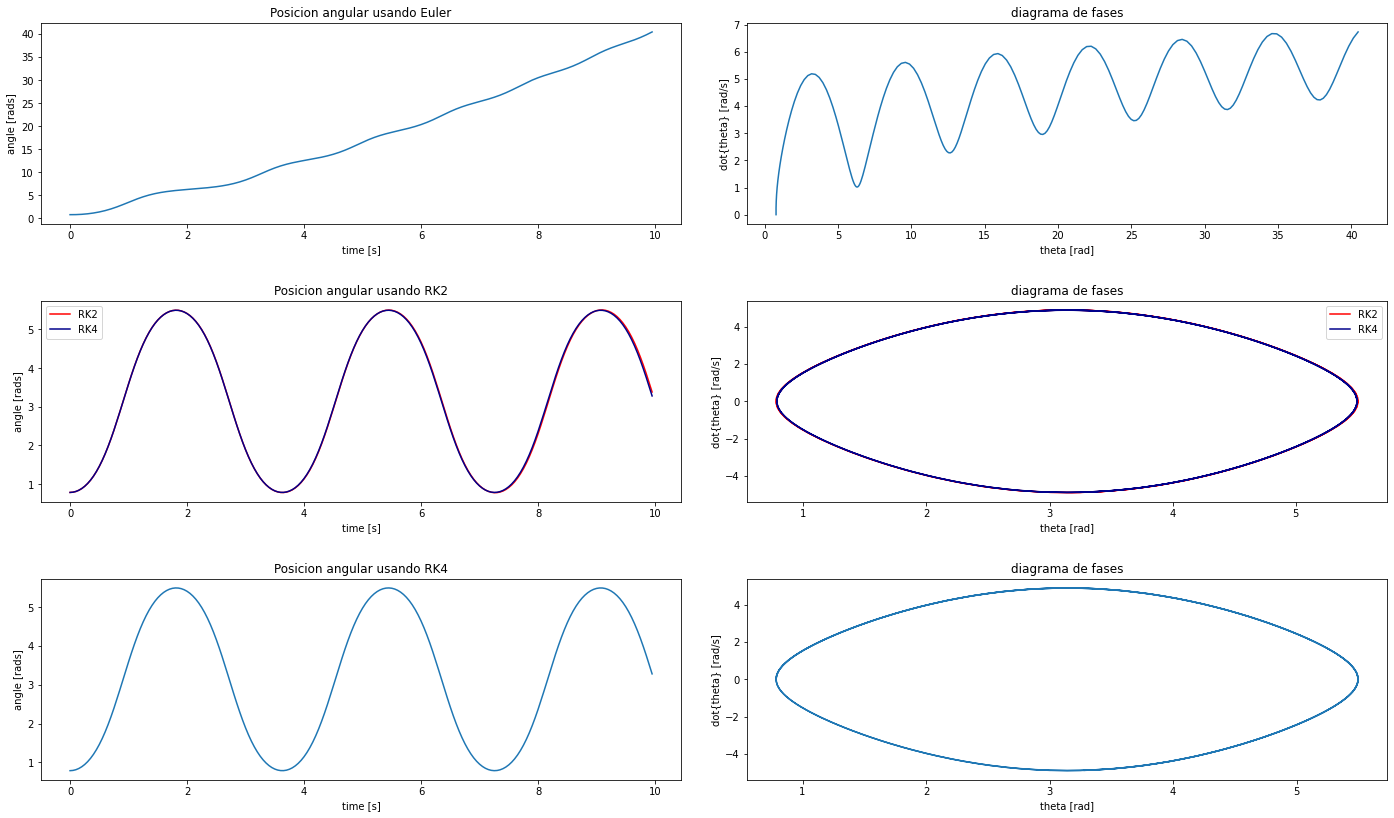

In [92]:
plt.figure(figsize = (20,12))

plt.subplot(321)
plt.plot(t_e, X_euler[0,:])
plt.xlabel('time [s]')
plt.ylabel('angle [rads]')
plt.title('Posicion angular usando Euler')


plt.subplot(322)
plt.plot(X_euler[0,:], X_euler[1,:])
plt.xlabel('theta [rad]')
plt.ylabel('dot{theta} [rad/s]')
plt.title('diagrama de fases')

plt.subplot(323)
plt.plot(t, X_RK2[0,:], color = 'red', label = 'RK2')
plt.plot(t, X_RK4[0,:], color = 'darkblue', label = 'RK4')
plt.xlabel('time [s]')
plt.ylabel('angle [rads]')
plt.title('Posicion angular usando RK2')
plt.legend()

plt.subplot(324)
plt.plot(X_RK2[0,:], X_RK2[1,:], color = 'red', label = 'RK2')
plt.plot(X_RK4[0,:], X_RK4[1,:],color = 'darkblue', label = 'RK4')
plt.xlabel('theta [rad]')
plt.ylabel('dot{theta} [rad/s]')
plt.title('diagrama de fases')
plt.legend()

plt.subplot(325)
plt.plot(t, X_RK4[0,:])
plt.xlabel('time [s]')
plt.ylabel('angle [rads]')
plt.title('Posicion angular usando RK4')

plt.subplot(326)
plt.plot(X_RK4[0,:], X_RK4[1,:])
plt.xlabel('theta [rad]')
plt.ylabel('dot{theta} [rad/s]')
plt.title('diagrama de fases')


plt.tight_layout(pad=3.0)

plt.show()


## Ejercicio 18

Oscilador no lineal: Dada la ecuación $\ddot{x}(t)=-2 x^{3}(t)+x(t)$

1. Formular el problema como un sistema de ecuaciones de primer orden.

2. Utilizar el método de Runge-Kutta de cuarto orden para obtener las soluciones correspondientes a las condiciones iniciales $x(0)=-2 ;-1.9 ; \ldots ; 1.9 ; 2$ y $\dot{x}(0)=0$.

3. Graficarlas en el diagrama de fases.

4. Graficar la cantidad $\mathbb H(t)=\dot{x}^{2}(t)+x^{4}(t)-x^{2}(t)$ para cada solución.

5. Obtener el período $T$ en cada caso y graficar $T$ vs. ${H}$